# Task 2-Predict the optimum number of clusters and represent it visually, from the given ‘Iris’ dataset.

**K-means Clustering with Python**

In this task, we will predict Iris flower species(iris-sesota,iris-versicolor and iris-virginica) with K-means Clustering using Python.

**Clustering**

Clustering is an unsupervised learning method that allows us to group set of objects based on similar characteristics.
Generally, it helps us in  finding meaningful structure among our data, group similar data together and discover 
underlying patterns.One of the most common clustering methods is K-means algorithm.

# Author - Ela Shresth

...............................................................................................................................

**Let’s start by importing the required libraries. Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster, as shown below.**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**We’re reading the Iris dataset using the read_csv Pandas method and storing the data in a data frame df.**

In [2]:
#Loading dataset file
df = pd.read_csv('task2.csv')
print("Data imported successfully")

Data imported successfully


**We use the df method on the dataset to see all its records.**

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**We use the head() method on the dataset to see its first 5 records.**

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**We use the tail() method on the dataset to see its last 5 records**

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# displaying all the features of the data
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
df.shape

(150, 6)

In [9]:
#Showing statistics on the current data 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#Finding null values in the dataset
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

**Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:**

In [11]:
# Assigning values to variables x and y from the data.
x = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values

**K-means Clustering Algorithm**

The goal of this algorithm isto partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.
K means works through the following iterative process:
    
1.Picking a value for k (the number of clusters to create)

2.Initializing k ‘centroids’ (starting points) in our data

3.Creating our clusters. Assigning each point to the nearest centroid.

4.Making our clusters better. Moving each centroid to the center of its cluster.

5.Repeating steps 3–4 until your centroids converge.

**To start, let’s arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5. For this we will instantiate the KMeans class and assign it to the variable kmeans5:**

# Implementing k-means with k=5

**Below, we can see the output of the k-means clustering model with k=5. Note that we can find the centers of 5 clusters formed from the data:**

In [12]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
kmeans5.cluster_centers_

array([[ 15.        ,   5.03793103,   3.45862069,   1.46896552],
       [ 75.        ,   5.95483871,   2.7483871 ,   4.28709677],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 44.5       ,   5.33333333,   3.22      ,   2.34666667],
       [105.5       ,   6.25333333,   2.85666667,   5.11333333]])

**There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.**

**This graph generally ends up shaped like an elbow, hence its name:**

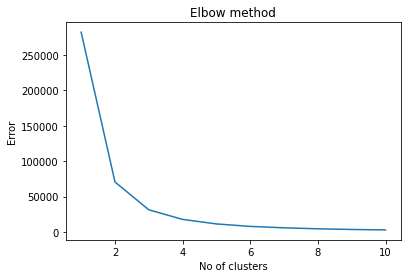

In [14]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

**The output graph of the Elbow method is shown above. Note that the shape of elbow is approximately formed at k=3.**

**As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.**

# Implementing again k-means with k=3

In [15]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [16]:
kmeans3.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

**Finally, its time to visualize the three clusters that are formed with the optimal k value. We can clearly see three clusters in the image below, with each cluster represented by a different color.**

# Visualizing K-means Clustering

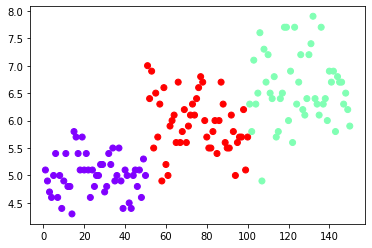

In [17]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, cmap='rainbow')

# Thank You!